In [60]:
print ("Manuel Daza - 202016908_59")

Manuel Daza - 202016908_59


In [61]:
#Importamos las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Librerias para modelos de ciencia de Datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
#Leemos los datos para cargarlos en la variable

data = pd.read_csv('./Titanic.csv')

#VARIABLE DESCRIPTIONS
PassengerId Numero de Identificacion\
Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)\
survival Survival (0 = No; 1 = Yes)\
name Name\
sex Sex\
age Age\
sibsp Number of Siblings/Spouses Aboard\
parch Number of Parents/Children Aboard\
ticket Ticket Number\
fare Passenger Fare (British pound)\
cabin Cabin\
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)stination

In [63]:
#1. Analisis Exploratorio de los Datos:

data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [64]:
#Descripcion de los datos

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
#2. Preprocesar los datos limpiándolos:

data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891,891,891,714,891,891,891
mean,446,0.383838,2.30864,29.6991,0.523008,0.381594,32.2042
std,257.354,0.486592,0.836071,14.5265,1.10274,0.806057,49.6934
min,1,0,1,0.42,0,0,0
25%,223.5,0,2,20.125,0,0,7.9104
50%,446,0,3,28,0,0,14.4542
75%,668.5,1,3,38,1,0,31
max,891,1,3,80,8,6,512.329


Text(0.5, 1.0, 'Identificación Datos Faltantes y Atípicos')

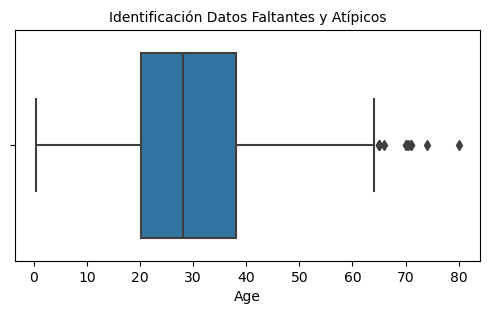

In [66]:
# Grafico para identificar valores atipicos en la Edad

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age'])
plt.title('Identificación Datos Faltantes y Atípicos', fontsize=10)

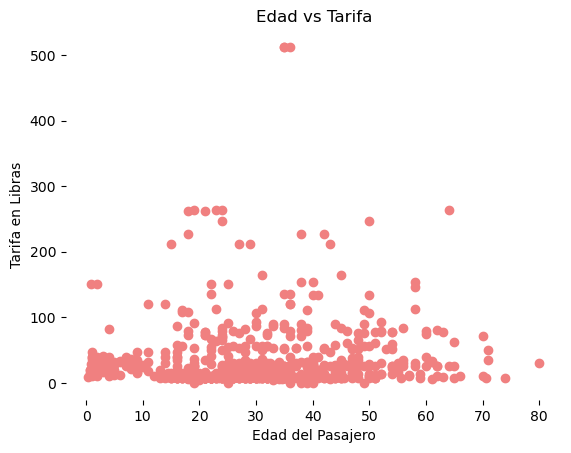

In [67]:
#Buscamos la relacion la Edad y la Tarifa pagada (Libras)

plt.scatter(data['Age'], data['Fare'], color = 'lightcoral')
plt.title('Edad vs Tarifa')
plt.xlabel('Edad del Pasajero')
plt.ylabel('Tarifa en Libras')
plt.box(False)
plt.show()

In [68]:
#Revisamos Datos Faltantes

print ("Pasajeros sin Registro de Edad: ",data['Age'].isnull().sum().sum())
print ("Pasajeros sin Registro de Supervivencia: ",data['Survived'].isnull().sum().sum())
print ("Pasajeros sin Registro de Tarifa: ",data['Fare'].isnull().sum().sum())
print ("Pasajeros sin Registro de Genero: ",data['Sex'].isnull().sum().sum())

Pasajeros sin Registro de Edad:  177
Pasajeros sin Registro de Supervivencia:  0
Pasajeros sin Registro de Tarifa:  0
Pasajeros sin Registro de Genero:  0


In [69]:
#Reemplazamos los valores nulos con un 0

data['Age'].fillna(0, inplace = True)

In [70]:
#Reemplazamos el valor 0 con el promedio de la columna

data['Age']=data['Age'].replace(0,data['Age'].mean())

In [71]:
print ("Pasajeros sin Registro de Edad: ",data['Age'].isnull().sum().sum())
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

Pasajeros sin Registro de Edad:  0


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891,891,891,891,891,891,891
mean,446,0.383838,2.30864,28.5271,0.523008,0.381594,32.2042
std,257.354,0.486592,0.836071,13.2136,1.10274,0.806057,49.6934
min,1,0,1,0.42,0,0,0
25%,223.5,0,2,22,0,0,7.9104
50%,446,0,3,24,0,0,14.4542
75%,668.5,1,3,35,1,0,31
max,891,1,3,80,8,6,512.329


In [72]:
#Revisamos Datos atipicos en la Edad

ca_min=1
ca_max=80
total_atipicos=((data['Age']<ca_min)|(data['Age']>ca_max)).sum()
print("El total de datos atipicos es: {}".format(total_atipicos))

El total de datos atipicos es: 7


In [73]:
#Filtrar datos atipicos centrando el nivel de Acidez.

data=data[(data['Age']<ca_max)&(data['Age']>ca_min)]

In [74]:
#Reconteo Datos atipicos en la Edad

ca_min=1
ca_max=80
total_atipicos=((data['Age']<ca_min)|(data['Age']>ca_max)).sum()
print("El total de datos atipicos es: {}".format(total_atipicos))

El total de datos atipicos es: 0


In [75]:
#Revisamos el tipo de informacion por Columnas

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  876 non-null    int64  
 1   Survived     876 non-null    int64  
 2   Pclass       876 non-null    int64  
 3   Name         876 non-null    object 
 4   Sex          876 non-null    object 
 5   Age          876 non-null    float64
 6   SibSp        876 non-null    int64  
 7   Parch        876 non-null    int64  
 8   Ticket       876 non-null    object 
 9   Fare         876 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     874 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 89.0+ KB


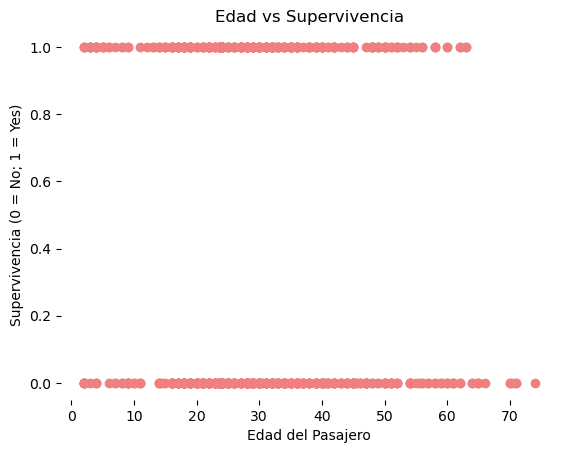

In [76]:
#Buscamos la relacion entre la Edad y Tasa de Supervivencia

plt.scatter(data['Age'], data['Survived'], color = 'lightcoral')
plt.title('Edad vs Supervivencia')
plt.xlabel('Edad del Pasajero')
plt.ylabel('Supervivencia (0 = No; 1 = Yes)')
plt.box(False)
plt.show()

In [77]:
#3. Seleccionar las características más relevantes para entrenar:
#El objetivo es predecir la probabilidad de Supervivencia en funcion de la Edad

data['Survived'].value_counts()


Survived
0    547
1    329
Name: count, dtype: int64

In [78]:
#Dividimos el Dataset entre la variable Y dependiente y la X independiente

X = data[['Age']]  # independente
Y = data['Survived']  # dependente

In [79]:
#4. Dividir el dataset en Train y Test para evaluar:
#Usamos 70% para entrenamiento y 30% para pruebas

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [80]:
#Se usa la funcion train_test_split para separar el bloque de entrenamiento
print (X_train)


           Age
239  33.000000
572  36.000000
245  44.000000
338  45.000000
276  45.000000
..         ...
850   4.000000
196  23.799293
638  41.000000
567  29.000000
694  60.000000

[613 rows x 1 columns]


In [81]:
print(Y_train)

239    0
572    1
245    0
338    1
276    0
      ..
850    0
196    0
638    0
567    0
694    0
Name: Survived, Length: 613, dtype: int64


In [82]:
#5. Entrenamos el Modelo

modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, Y_train)

LinearRegression()

In [83]:
Y_prediccion_test = modelo_regresion.predict(X_test)
Y_prediccion_train = modelo_regresion.predict(X_train)

In [84]:
print(Y_prediccion_test)

[0.38536845 0.39220539 0.38556448 0.38556448 0.37364799 0.3941588
 0.40490256 0.35313718 0.39025198 0.38146163 0.3580207  0.38048493
 0.38556448 0.38556448 0.39025198 0.38556448 0.38556448 0.36095082
 0.38556448 0.37267128 0.38732186 0.35020706 0.38732186 0.38341504
 0.38243834 0.36192753 0.40001903 0.38556448 0.38556448 0.37755481
 0.39025198 0.37950822 0.38439175 0.35216047 0.38556448 0.38243834
 0.38048493 0.38556448 0.39025198 0.37267128 0.39122868 0.38732186
 0.38732186 0.38536845 0.37950822 0.37364799 0.35606729 0.39122868
 0.39513551 0.38556448 0.38556448 0.37755481 0.39025198 0.37950822
 0.39025198 0.35216047 0.37950822 0.40294915 0.38146163 0.3756014
 0.38927527 0.3931821  0.39025198 0.38556448 0.37755481 0.38556448
 0.38556448 0.38556448 0.38556448 0.3941588  0.38634516 0.38556448
 0.38536845 0.34727695 0.38243834 0.38556448 0.38927527 0.37462469
 0.37364799 0.38556448 0.37267128 0.36974117 0.37853152 0.37950822
 0.37169458 0.40001903 0.38556448 0.35997412 0.38536845 0.406855

In [85]:
print(Y_prediccion_train)

[0.37657811 0.37364799 0.36583435 0.36485764 0.36485764 0.3931821
 0.40294915 0.37364799 0.38048493 0.38439175 0.37755481 0.38556448
 0.38556448 0.39122868 0.38829857 0.3931821  0.38439175 0.37462469
 0.38829857 0.39025198 0.37950822 0.38556448 0.38829857 0.38556448
 0.37950822 0.38556448 0.3756014  0.38634516 0.38556448 0.35997412
 0.39220539 0.3756014  0.37071787 0.38556448 0.36876446 0.38536845
 0.38829857 0.36778776 0.38556448 0.36583435 0.36778776 0.38927527
 0.36290423 0.37364799 0.38439175 0.38341504 0.38634516 0.39904233
 0.3931821  0.38927527 0.37853152 0.3756014  0.36485764 0.38048493
 0.39025198 0.38556448 0.37511305 0.38927527 0.38341504 0.3931821
 0.36192753 0.3931821  0.36192753 0.38341504 0.35509059 0.3394633
 0.38048493 0.40392585 0.39611221 0.36876446 0.38341504 0.36778776
 0.38556448 0.38556448 0.37853152 0.38341504 0.38556448 0.39513551
 0.38732186 0.40392585 0.36485764 0.38927527 0.37071787 0.37169458
 0.38634516 0.37169458 0.33653319 0.37755481 0.39513551 0.3912286

In [86]:
print(Y_test)

142    1
114    0
740    1
298    1
265    0
      ..
119    0
12     0
158    0
128    1
415    0
Name: Survived, Length: 263, dtype: int64


In [87]:
#6. Evaluar el desempeño del modelo en el conjunto de Test:

mse = mean_squared_error(Y_test, Y_prediccion_test)
r2 = r2_score(Y_test, Y_prediccion_test)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.23183713438192577
R-squared: -0.00024592989417526745


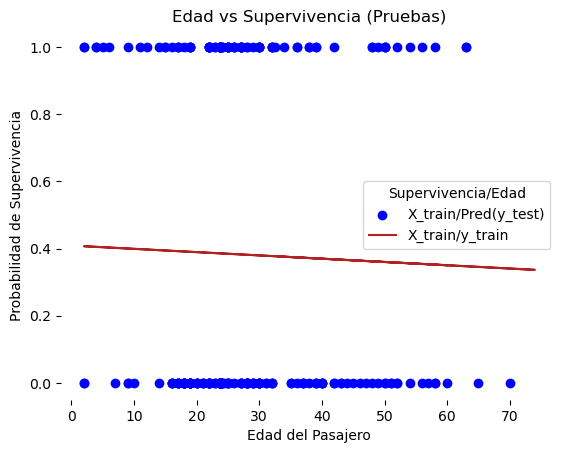

In [88]:
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo:

plt.scatter(X_test, Y_test, color = 'blue')
plt.plot(X_train, Y_prediccion_train, color = 'firebrick')
plt.title('Edad vs Supervivencia (Pruebas)')
plt.xlabel('Edad del Pasajero')
plt.ylabel('Probabilidad de Supervivencia')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Supervivencia/Edad', loc='best', facecolor='white')
plt.box(False)
plt.show()

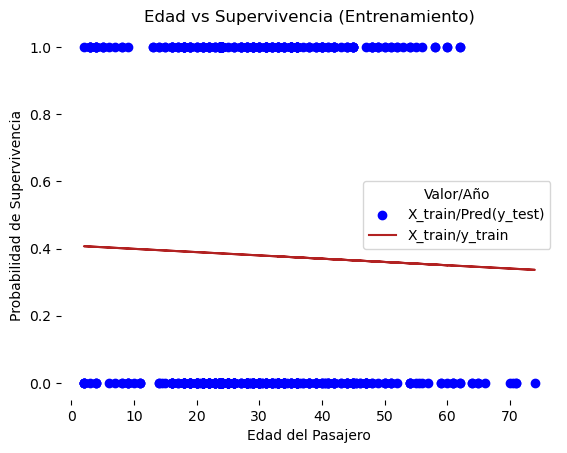

In [89]:
plt.scatter(X_train, Y_train, color = 'blue')
plt.plot(X_train, Y_prediccion_train, color = 'firebrick')
plt.title('Edad vs Supervivencia (Entrenamiento)')
plt.xlabel('Edad del Pasajero')
plt.ylabel('Probabilidad de Supervivencia')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Valor/Año', loc='best', facecolor='white')
plt.box(False)
plt.show()

#8. Interpretar, analizar y documentar los resultados obtenidos: 

Se pueden interpretar los resultados obtenidos que la probabilidad que tiene el pasajero si es menor de 65 años era mas alta, igualmente los niños menores de 15 años tambien tuvieron prioridad a la hora de seleccionar los pasajeros sobrevivientes.

Por la tanto la grafica nos ayuda a interpretar que a mayor edad del pasajero menor es la probabilidad de sobrevivir en el Titanic.
